In order to run this notebook, please use the ".xlsx" file available in the same directory in my github page.

In [1]:
import numpy as np
from openpyxl import load_workbook
from matplotlib import pyplot as plt

In [2]:
#loading the data
crud=load_workbook('A02_GAIN_MIN20_373.xlsx')
sheet=crud['All']

nu=[sheet['A'+repr(i+1)].value for i in range(4096)]
nu=np.asarray(nu)
gain=[sheet['B'+repr(i+1)].value for i in range(4096)]
gain=np.asarray(gain)
nu=nu/1e6 #convert frequency from Hz to MHz

nu_min=15

ii=nu>nu_min
nu=nu[ii]
gain=gain[ii]

# Classical Fit (order 5)

RMS error after fit is 0.05132115742704425


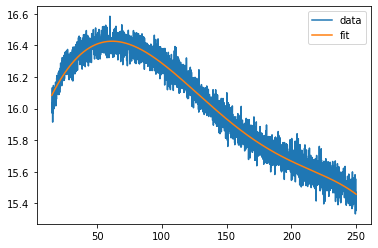

In [3]:
order=5
A=np.polynomial.polynomial.polyvander(nu,order)


#Classical Fit
lhs=A.T@A
rhs=A.T@gain
pp=np.linalg.inv(lhs)@rhs
pred_poly=A@pp

print('RMS error after fit is ' + repr(np.sqrt(np.mean( (pred_poly-gain)**2))))

plt.ion()
plt.clf()
plt.plot(nu, gain, label= 'data')
plt.plot(nu, pred_poly, label='fit')
plt.legend()
plt.show()

# QR Fit (order 5)

In [4]:
#QR decompostion
q, r=np.linalg.qr(A)
fitp = np.linalg.inv(r)@q.T@gain
pred = A@fitp

RMS error after fit is 0.051321157427044156


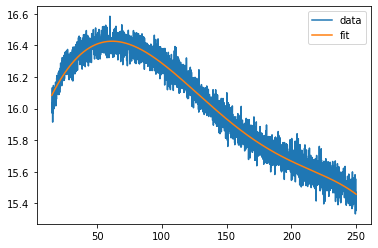

In [5]:
print('RMS error after fit is ' + repr(np.sqrt(np.mean( (pred -gain)**2))))
plt.ion()
plt.clf()
plt.plot(nu, gain, label= 'data')
plt.plot(nu, pred, label= 'fit')
plt.legend()
plt.show()
N=np.std(gain-pred)**2

# Classical Fit (order 10)

RMS error after fit is 0.44972087013184686


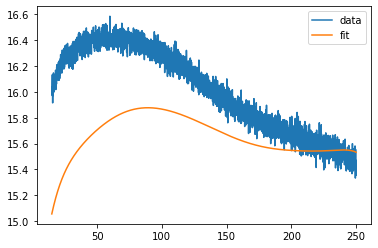

In [6]:
order= 10
A=np.polynomial.polynomial.polyvander(nu,order)


#Classical Fit
lhs=A.T@A
rhs=A.T@gain
pp=np.linalg.inv(lhs)@rhs
pred_poly=A@pp

print('RMS error after fit is ' + repr(np.sqrt(np.mean( (pred_poly-gain)**2))))

plt.ion()
plt.clf()
plt.plot(nu, gain, label= 'data')
plt.plot(nu, pred_poly, label= 'fit')
plt.legend()
plt.show()

As seen in the plot above, the classical fit is no longer stable when the order of the polynomial goes up.

# QR Fit (order 10)

We will see that by using the QR, the fit will stay stable even for high orders of polynomial.

In [7]:
#QR decompostion
q, r=np.linalg.qr(A)
fitp = np.linalg.inv(r)@q.T@gain
pred = A@fitp

RMS error after fit is 0.05039899502921264


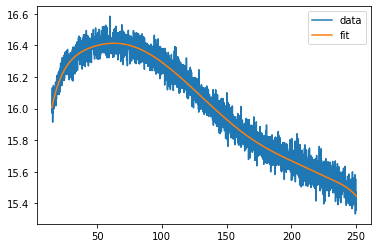

In [8]:
print('RMS error after fit is ' + repr(np.sqrt(np.mean( (pred -gain)**2))))
plt.ion()
plt.clf()
plt.plot(nu, gain, label= 'data')
plt.plot(nu, pred, label= 'fit')
plt.legend()
plt.show()
N=np.std(gain-pred)**2

# QR Fit With the Noise Matrix 

In order to take the effect of noise matrix into account, I will draw random samples from the noise matrix and add them to my data as a correlated noise.

An arbitrary noise matrix can be chosen to do the job. In this case, I will use:

$N_{i j}=1+\delta_{i, j}$

In [9]:
#constructing an example noise matrix
n = 3851
N = np.zeros((n, n))
for i in range(n):
    for j in range(n):
        N [i, j] = 1
        if i == j:
            N [i, j] = N [i, j] + 1

In [10]:
#function to draw samples from our noise matrix
def draw_samples(N):
    n = N.shape[0]
    mat = np.random.randn(n, 1)
    L = np.linalg.cholesky(N)
    return np.real(L@mat)

In [11]:
noise = draw_samples(N)

In [12]:
# adding the noise to data
gain_new = np.zeros(len(nu))
noise = np.reshape(noise , len(nu))
gain_new = gain + noise
print(np.shape(gain_new))

(3851,)


In [13]:
#the QR fit
order= 5
A=np.polynomial.polynomial.polyvander(nu,order)

#QR decompostion
q, r=np.linalg.qr(A)
fitp = np.linalg.inv(r)@q.T@gain_new
pred = A@fitp

RMS error after fit is 1.009322381935803


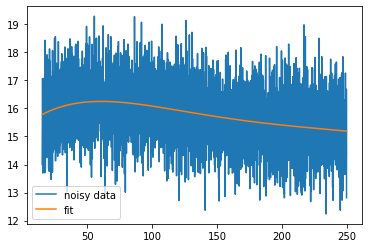

In [14]:
print('RMS error after fit is ' + repr(np.sqrt(np.mean( (pred -gain_new)**2))))
plt.ion()
plt.clf()
plt.plot(nu, gain_new, label= 'noisy data')
plt.plot(nu, pred, label= 'fit')
plt.legend()
plt.show()
N=np.std(gain-pred)**2